## HW6:  Statistical Fundamentals 
### Assigned: 10/10
### Due: 10/17

In [17]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

###### 1. In the Week 6 Statistics class we used the example of political polling and the need for random sampling to avoid bias. 

#### How can we introduce error if we do not sufficiently randomize our sampling?

In [ ]:
#NAn

2. What is the difference between variance and standard deviation ?

Variance is the average of the squared difference from the mean and standard deviation is square root of variance. Variance gives the average degree to which each data point differs from mean and standard deviation gives the spread between numbers in a dataset. 

3. Load the sklearn California housing dataset into a DataFrame.  Don't forget to get the target column as well.

#### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [41]:
import pandas as pd
from sklearn.datasets import fetch_california_housing 
cali = fetch_california_housing() 

X = pd.DataFrame(cali.data) 
X.columns = cali.feature_names

y = pd.DataFrame(cali.target)
y.columns = cali.target_names
#feature_names = cali.feature_names 
#target_names = cali.target_names 



In [76]:
X.shape

(20640, 8)

In [77]:
y.shape

(20640, 1)

4. Calculate the Variance and Standard Deviation of each column using the pandas functions.

In [60]:
print("Standard Deviation is: ")
X.std()


Standard Deviation is: 


MedInc           1.899822
HouseAge        12.585558
AveRooms         2.474173
AveBedrms        0.473911
Population    1132.462122
AveOccup        10.386050
Latitude         2.135952
Longitude        2.003532
dtype: float64

In [61]:
print("Variance is: ")
X.var()

Variance is: 


MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
dtype: float64

5. Create a correlation matrix for the columns (including the target column, or median house value).
#### Which feature has the highest correlation to the target?

In [85]:
merge = [X,y]
df_merge = pd.concat([X,y],axis=1)
#axis = 1 joins by columns

In [88]:
df_merge.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
df_merge.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


6. Create both KNN and Random Forest regression models on the California Housing data.  Pick an accuracy metric and determine which model is more accurate.  Remember to split training and testing data.

In [90]:
# KNN
"""## Split data into train and test sets"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=8)

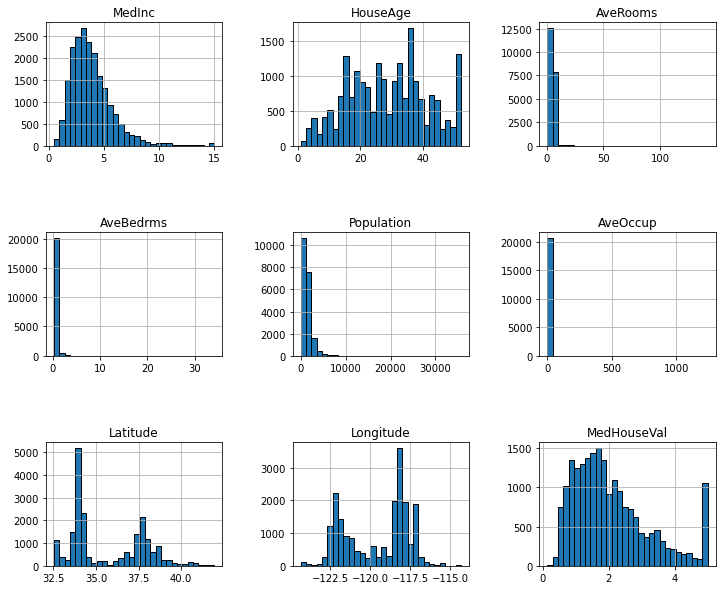

In [91]:
california_housing=fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10),bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create pipeline with min-max scaler followed by KNN regressor
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('knn', KNeighborsRegressor(n_neighbors=2))])

#fitting and transform training data
pipe.fit(X_train,y_train)

#transform test data
y_pred = pipe.predict(X_test) 

# compute RMSE
error = mean_squared_error(y_test,y_pred, squared=False)
print(error)


0.6767822465759739


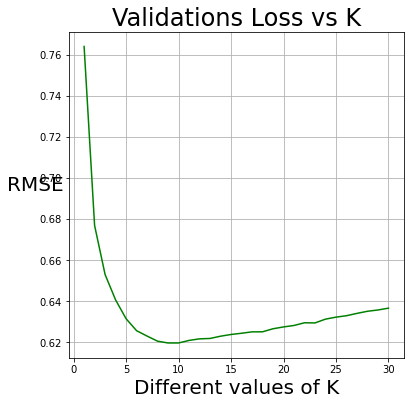

Lowest rmse value comes when K is:9
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
KNeighborsRegressor(n_neighbors=8)
RMSE value for k is:  1.0638597215430543


In [102]:

### Finding the best value of k through cross validation
##In case of KNN the no. of neighbours is the hyperparameter that we have to tune it through cross validation

#to store rmse values for different k
rmse_val = [] 

for K in range(1,31):
    
  pipe = Pipeline([('scaler', MinMaxScaler()), 
                   ('knn', KNeighborsRegressor(n_neighbors=K))])
  
  #fit the model
  pipe.fit(X_train, y_train)  

  # make prediction on test set
  pred=pipe.predict(X_test) 
  
  # calculate rmse
  error = mean_squared_error(y_test,pred, squared=False)
  
  #store rmse values
  rmse_val.append(error)

"""## Learning Curve
### Plotting RMSE vs K, curve to find best value of K
"""

plt.figure(figsize=(6,6))

#plotting the rmse values against k values
plt.plot(range(1, len(rmse_val)+1), rmse_val, color='green') 
plt.xlabel('Different values of K', fontsize=20) 
plt.ylabel('RMSE', fontsize=20, rotation=0) 
plt.grid(True)
  
# displaying the title
plt.title("Validations Loss vs K", fontsize=24)
  
plt.show()

# index=np.argmin(rmse_val)
print('Lowest rmse value comes when K is:{}'.format(np.argmin(rmse_val)+1))

"""# Performing Grid Search CV"""

k_range = list(range(1, 31))
params = dict(n_neighbors=k_range)
print(params)

reg_knn = KNeighborsRegressor()

#validate model with his parameters
gs = GridSearchCV(estimator=reg_knn, 
                  param_grid=params, 
                  cv=10, n_jobs=-1) 
gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn) #printing best estimator values

model = KNeighborsRegressor(n_neighbors=9)

model.fit(X_train, y_train)
pred=model.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test,pred, squared=False)
print('RMSE value for k is: ' , error)

In [106]:
reg_knn = KNeighborsRegressor()
param_grid = params
randSearchCV = RandomizedSearchCV(reg_knn, param_grid, cv=10)
randSearchCV.fit(X_train, y_train)

best_reg_knn = randSearchCV.best_estimator_

#best estimator using radomized search cv
print(best_reg_knn)

model = KNeighborsRegressor(n_neighbors=8)

model.fit(X_train, y_train)
pred=model.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test,pred, squared=False)
print(f'RMSE value for k = {8} is: ' , error)

"""# Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
"""

params = {'poly__degree':list(range(1,4)),
          'knn__n_neighbors': list(range(6, 12))}
print(params)

pipe = Pipeline(steps=[('poly', PolynomialFeatures()),
                       ('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor())])

#validate model with his parameters
gs = GridSearchCV(estimator=pipe, 
                  param_grid=params, 
                  cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_

# printing best estimator values
print(reg_knn)

KNeighborsRegressor(n_neighbors=8)
RMSE value for k = 8 is:  1.0629125376781874
{'poly__degree': [1, 2, 3], 'knn__n_neighbors': [6, 7, 8, 9, 10, 11]}
Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=8))])
